In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('google_stock.csv')
df.shape


(4431, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [5]:
# df['Date'].sample(10)
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# df['Date'].isnull().sum()
df.drop(columns=['Adj Close'],inplace=True)

In [7]:
df.head()
# print(df.shape)

,Date,Open,High,Low,Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602


In [8]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4431 non-null   datetime64[ns]
 1   Open    4431 non-null   float64       
 2   High    4431 non-null   float64       
 3   Low     4431 non-null   float64       
 4   Close   4431 non-null   float64       
 5   Volume  4431 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 207.8 KB


In [10]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,4431,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,2013-06-06 07:42:07.555856384,693.087345,699.735595,686.078751,693.097367,6.444992e+06
min,2004-08-19 00:00:00,49.644646,50.920921,48.028027,50.055054,4.656000e+05
25%,2009-01-12 12:00:00,248.558563,250.853355,245.813309,248.415916,1.695600e+06
50%,2013-06-07 00:00:00,434.924927,437.887878,432.687683,435.330322,3.778418e+06
75%,2017-10-28 12:00:00,1007.364990,1020.649994,997.274994,1007.790008,8.002390e+06
max,2022-03-24 00:00:00,3025.000000,3030.929932,2977.979980,2996.770020,8.215117e+07
std,NaN,645.118799,651.331215,638.579488,645.187806,7.690351e+06


<Axes: >

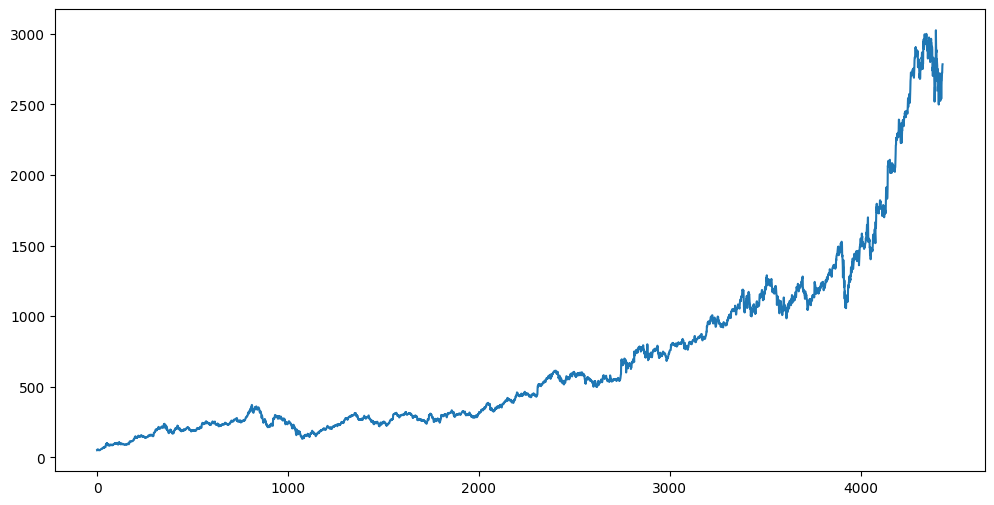

In [11]:
df['Open'].plot(figsize=(12,6))

In [13]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

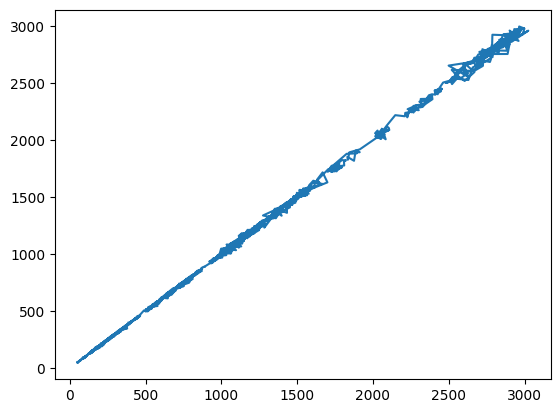

In [15]:
plt.plot(X_test,y_test)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,train_size=0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-5.97486253e-01,  7.95833069e-01,  8.01812759e-01, -1.53319403e-08])

In [ ]:
lr.intercept_

0.22110226630275065

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
dfr = pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})

In [ ]:
dfr

,Actual Price,Predicted Price
1522,235.385391,234.982032
129,97.072075,95.113776
1986,293.298309,292.952078
646,223.318314,223.497761
1728,249.034027,248.515810
...,...,...
2370,575.840820,575.663804
3928,1110.260010,1127.770135
2814,681.140015,682.737615
2978,704.250000,705.410411


In [ ]:
# lr.score(X_test,y_test)
r2_score(y_test, y_pred)

0.9999125219091864

<Axes: >

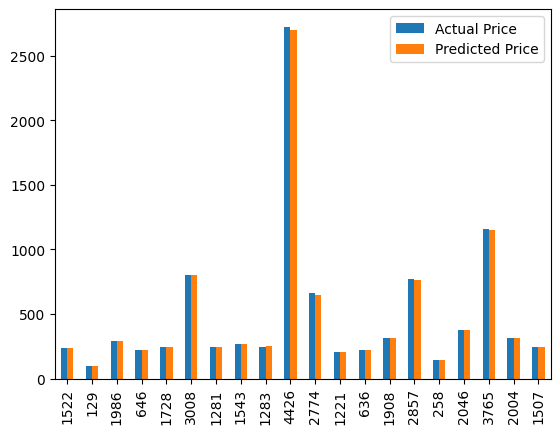

In [ ]:
graph = dfr.head(20)

graph.plot(kind='bar')